In [61]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Import .csv
df = pd.read_csv("dataframe_voor_analyse3.csv")
df = df.drop("Unnamed: 0", axis=1)

In [35]:
# df.head() to get info about the columns at first sight (Display the first 5 rows)
df.head()

,Number,Dn,Ur,Keyword,Kd,keyword_density_percentage,HeaderCount,ListsCount,InternalLinksSoup,ExternalLinksSoup,...,CLS,original_publication,last_modified,days_between,MetaTitleExists,MetaDescriptionExists,KeyWordInMetaTitle,KeyWordInMetaDescription,KeyWordInUrl,KeyWordInImageTags
0,0.0,bouwmaat.nl,https://www.bouwmaat.nl/bouwmaterialen,bouwmaterialen,84.13,0.46,4.0,31.0,NaN,NaN,...,80.0,2021-05-20,2021-05-20,0.0,1,1,1,1,1,0
1,1.0,hornbach.nl,https://www.hornbach.nl/shop/Bouwmateriaal/S44...,bouwmaterialen,84.13,0.73,10.0,17.0,216.0,7.0,...,65.0,2020-01-01,2020-01-01,0.0,1,1,1,0,0,0
2,2.0,bouwbestel.nl,https://www.bouwbestel.nl/bouwmaterialen.html,bouwmaterialen,84.13,0.28,2.0,7.0,2595.0,14.0,...,3.0,2007-01-01,2021-01-01,5114.0,1,1,1,1,1,0
3,3.0,online-bouwmaterialen.nl,https://www.online-bouwmaterialen.nl/,bouwmaterialen,84.13,1.19,3.0,31.0,138.0,10.0,...,1.0,2011-01-01,2011-01-01,0.0,1,1,1,1,1,1
4,4.0,bmn.nl,https://www.bmn.nl/,bouwmaterialen,84.13,0.24,3.0,12.0,563.0,5.0,...,1.0,2021-01-01,2021-01-01,0.0,1,1,1,1,0,1


In [36]:
# df.info() - Display all column(s info)
df.info()

# Bijzonderheden:
#
#
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Number                      99 non-null     float64
 1   Dn                          99 non-null     object 
 2   Ur                          99 non-null     object 
 3   Keyword                     99 non-null     object 
 4   Kd                          99 non-null     float64
 5   keyword_density_percentage  95 non-null     float64
 6   HeaderCount                 97 non-null     float64
 7   ListsCount                  93 non-null     float64
 8   InternalLinksSoup           96 non-null     float64
 9   ExternalLinksSoup           96 non-null     float64
 10  InternalLinksSEMrush        76 non-null     float64
 11  ExternalLinksSEMrush        78 non-null     float64
 12  BacklinksSEMrush            97 non-null     float64
 13  PageAScore                  98 non-nu

In [ ]:
# Count difference in days
df['DaysOld'] =  today - df['last_modified']

In [86]:
# df.describe() - Display count, min, max, mean etc...
df.describe().transpose()

TypeError: unsupported operand type(s) for -: 'datetime.date' and 'str'

In [38]:
# Extra variable to save the correlations
corrdata = df.corr()

<AxesSubplot:>

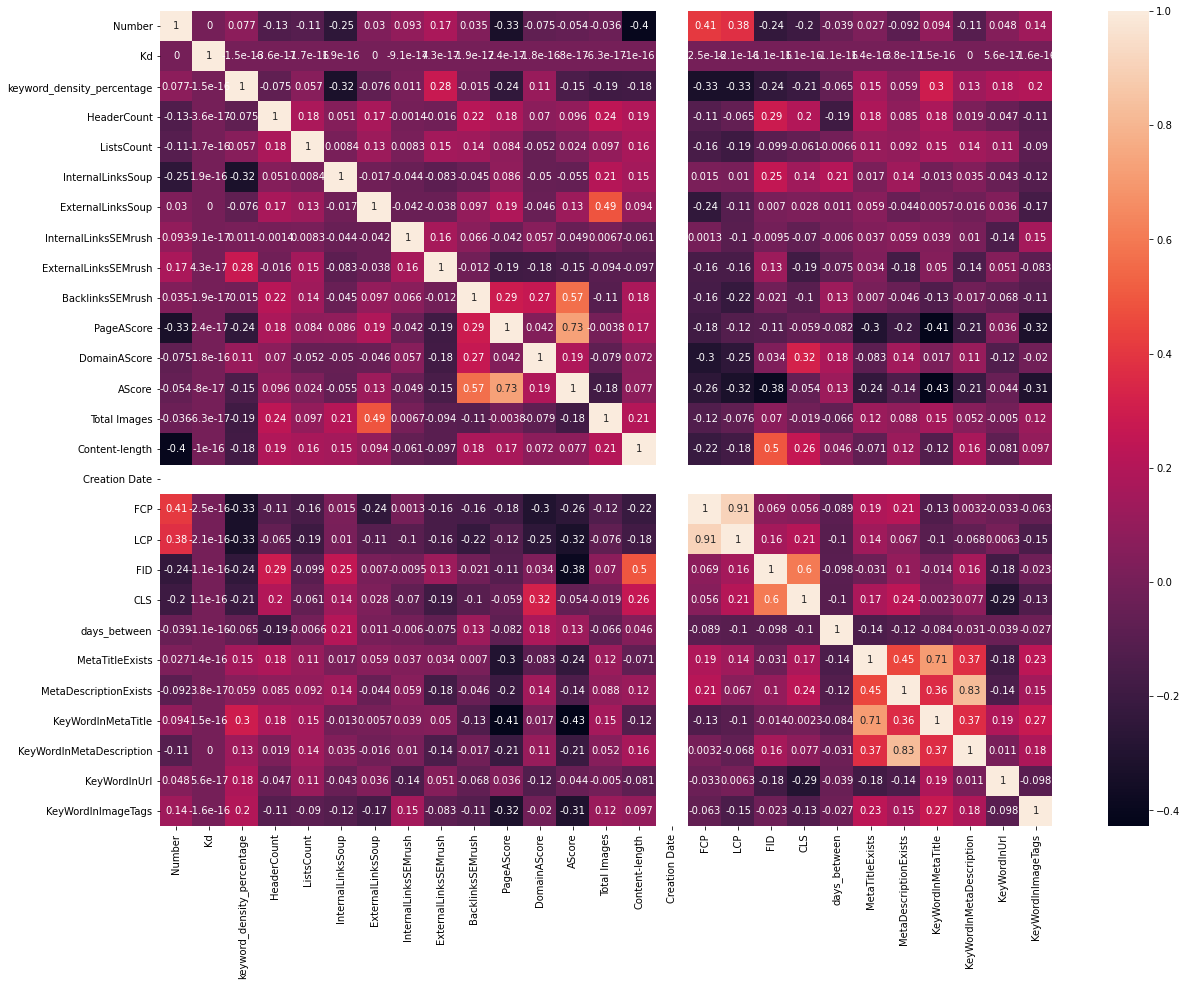

In [39]:
# Visualize the correlations with a sns heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(corrdata, annot=True)

In [79]:
# Get only numerical values
numericalData = df.select_dtypes(include='number').values

array([[ 0.  , 84.13,  0.46, ...,  1.  ,  1.  ,  0.  ],
       [ 1.  , 84.13,  0.73, ...,  0.  ,  0.  ,  0.  ],
       [ 2.  , 84.13,  0.28, ...,  1.  ,  1.  ,  0.  ],
       ...,
       [96.  , 84.13,  2.24, ...,  1.  ,  1.  ,  0.  ],
       [97.  , 84.13,  1.13, ...,  0.  ,  1.  ,  0.  ],
       [98.  , 84.13,  0.34, ...,  1.  ,  1.  ,  0.  ]])

In [62]:
# Standardize the data attributes
scaler = StandardScaler() 
scaler.fit(numericalData) 
standardized_dataset1 = scaler.transform(numericalData)
standardized_dataset = pd.DataFrame(standardized_dataset)
standardized_dataset

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-1.714643,0.0,-0.738792,0.048617,2.161905,NaN,NaN,-0.229053,-0.127518,-0.161998,...,0.248647,0.208437,2.371272,-0.430992,0.335201,0.739510,0.471405,0.894427,0.534522,-0.691095
1,-1.679650,0.0,-0.537410,2.620919,0.651008,0.004082,-0.155551,-0.238592,-0.124422,-0.162166,...,-1.388285,-0.108750,1.769572,-0.430992,0.335201,0.739510,0.471405,-1.118034,-1.870829,-0.691095
2,-1.644657,0.0,-0.873046,-0.808817,-0.428203,6.663591,0.091565,0.581732,-0.217306,-0.162162,...,-0.848284,-0.425937,-0.717456,3.685420,0.335201,0.739510,0.471405,0.894427,0.534522,-0.691095
3,-1.609665,0.0,-0.194316,-0.380100,2.161905,-0.214262,-0.049644,-0.620138,-0.243623,-0.162379,...,-0.515649,-0.425937,-0.797683,-0.430992,0.335201,0.739510,0.471405,0.894427,0.534522,1.446980
4,-1.574672,0.0,-0.902880,-0.380100,0.111402,0.975436,-0.226155,0.791582,0.028838,-0.162306,...,-0.619756,0.208437,-0.797683,-0.430992,0.335201,0.739510,0.471405,0.894427,-1.870829,1.446980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1.574672,0.0,2.259556,-0.380100,1.514378,-0.561374,-0.261457,1.211283,8.657805,-0.162380,...,NaN,NaN,NaN,-0.430992,0.335201,-1.352247,0.471405,-1.118034,0.534522,-0.691095
95,1.609665,0.0,0.812592,-0.808817,-0.428203,-0.558575,-0.296760,NaN,-0.087268,-0.162380,...,NaN,NaN,NaN,-0.430992,0.335201,0.739510,0.471405,0.894427,0.534522,1.446980
96,1.644657,0.0,0.588835,-1.237534,-0.644046,-0.452202,-0.226155,-0.515213,-0.091912,-0.162377,...,NaN,NaN,NaN,NaN,0.335201,0.739510,0.471405,0.894427,0.534522,-0.691095
97,1.679650,0.0,-0.239067,-0.380100,-0.212361,-0.424209,0.056263,1.898066,-0.225046,-0.162266,...,NaN,NaN,NaN,NaN,0.335201,0.739510,0.471405,-1.118034,0.534522,-0.691095


In [78]:
print(df.columns.tolist())

['Number', 'Dn', 'Ur', 'Keyword', 'Kd', 'keyword_density_percentage', 'HeaderCount', 'ListsCount', 'InternalLinksSoup', 'ExternalLinksSoup', 'InternalLinksSEMrush', 'ExternalLinksSEMrush', 'BacklinksSEMrush', 'PageAScore', 'DomainAScore', 'AScore', 'Total Images', 'ImageTags', 'Content-length', 'METATitle', 'METADescription', 'Creation Date', 'FCP', 'LCP', 'FID', 'CLS', 'original_publication', 'last_modified', 'days_between', 'MetaTitleExists', 'MetaDescriptionExists', 'KeyWordInMetaTitle', 'KeyWordInMetaDescription', 'KeyWordInUrl', 'KeyWordInImageTags']


In [59]:
# Extra variable to save the correlations
corrdata2 = standardized_dataset.corr()

<AxesSubplot:>

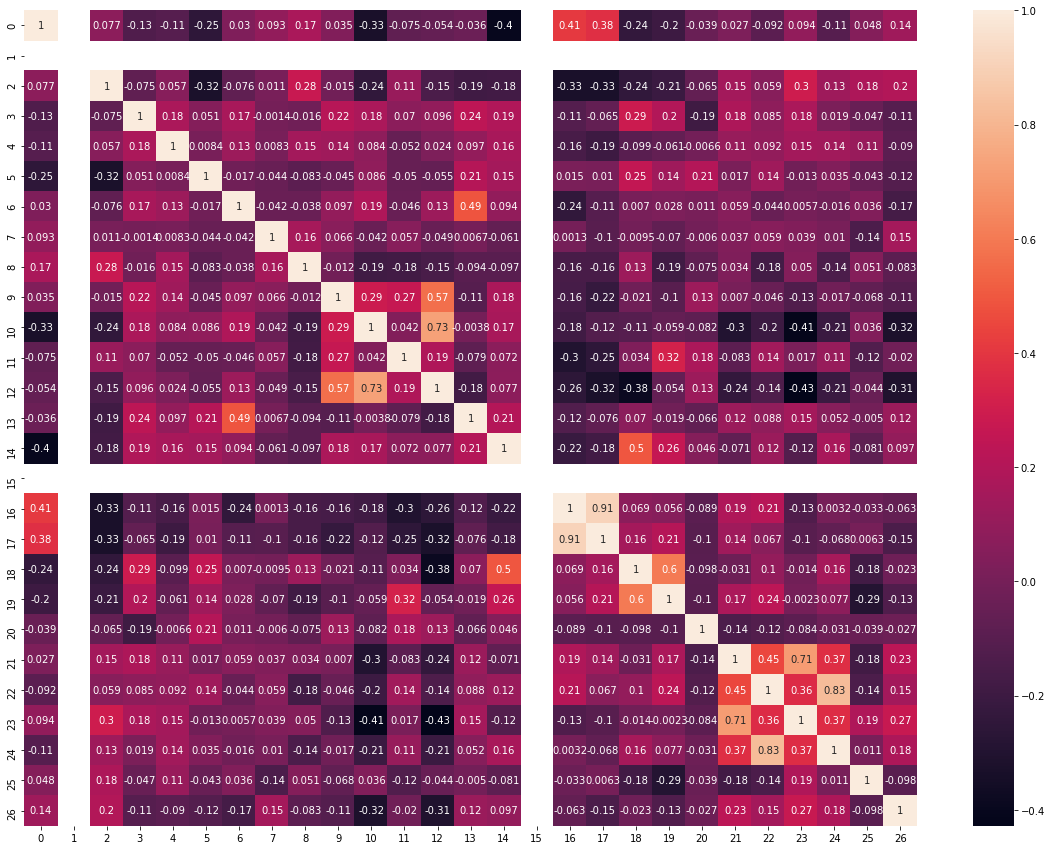

In [60]:
# Visualize the correlations with a sns heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(corrdata2, annot=True)

In [77]:
# Meervoudige regressie

model = ols("Number ~ FCP + KeyWordInMetaTitle + KeyWordInUrl + ExternalLinksSoup + ", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Number   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2.358
Date:                Thu, 20 May 2021   Prob (F-statistic):             0.0768
Time:                        14:16:17   Log-Likelihood:                -157.54
No. Observations:                  34   AIC:                             325.1
Df Residuals:                      29   BIC:                             332.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             12.6918     15